# Hypothesis Testing of BERTScore for Evaluated Models

In this notebook, we perform hypothesis testing on the BERTScore metrics of the evaluated models. This analysis helps to determine if there are statistically significant differences between the performance of different models. **Due to financial limitations, only 300 texts were generated.**

In [10]:
import json
import pandas as pd
import numpy as np
from scipy import stats

## Loading and Organizing BERTScore Results

We load the BERTScore results for both GPT-4 and GPT-3.5 from JSON files. These results include precision, recall, and F1 scores for each model. We then organize these results into a DataFrame for further analysis.

In [8]:
# Load the BERTScore results for GPT-4 from a JSON file
with open('BERTScore_results/results_longformer_cochrane_gpt4.json') as f:
    results_gpt4 = json.load(f)

# Load the BERTScore results for GPT-3.5 from a JSON file
with open('BERTScore_results/results_longformer_cochrane_gpt35.json') as f:
    results_gpt35 = json.load(f)

# Extract precision, recall, and F1 scores for GPT-4
results_gpt4_precision = results_gpt4['precision']
results_gpt4_recall = results_gpt4['recall']
results_gpt4_f1 = results_gpt4['f1']

# Extract precision, recall, and F1 scores for GPT-3.5
results_gpt35_precision = results_gpt35['precision']
results_gpt35_recall = results_gpt35['recall']
results_gpt35_f1 = results_gpt35['f1']

In [9]:
# Create a DataFrame to organize the results
results = pd.DataFrame()
results['Precision (GPT-3.5)'] = results_gpt35_precision
results['Precision (GPT-4)'] = results_gpt4_precision
results['Recall (GPT-3.5)'] = results_gpt35_recall
results['Recall (GPT-4)'] = results_gpt4_recall
results['F1 (GPT-3.5)'] = results_gpt35_f1
results['F1 (GPT-4)'] = results_gpt4_f1

# Display summary statistics of the results
results.describe()

,Precision (GPT-3.5),Precision (GPT-4),Recall (GPT-3.5),Recall (GPT-4),F1 (GPT-3.5),F1 (GPT-4)
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.790029,0.791219,0.772119,0.773441,0.780884,0.782157
std,0.017244,0.014706,0.016862,0.016250,0.014905,0.013611
min,0.745926,0.760849,0.728526,0.726916,0.752187,0.754501
25%,0.779020,0.783039,0.762432,0.764014,0.771847,0.773828
50%,0.788902,0.789874,0.770972,0.772589,0.778922,0.780125
75%,0.797277,0.796777,0.780081,0.781764,0.787061,0.788408
max,0.867520,0.852321,0.860769,0.846742,0.859598,0.849522


The GPT-4 model has slightly higher mean scores and lower standard deviations for precision, recall, and F1 compared to the GPT-3.5 model. This suggests that GPT-4 not only performs marginally better on average but also shows more consistency in its performance across the samples.

In [15]:
# Perform the paired t-test on precision, recall, and F1 scores
test_precision = stats.ttest_rel(results_gpt35_precision, results_gpt4_precision)
test_recall = stats.ttest_rel(results_gpt35_recall, results_gpt4_recall)
test_f1 = stats.ttest_rel(results_gpt35_f1, results_gpt4_f1)

In [17]:
# Print the results of the tests
print(test_precision)
print(test_recall)
print(test_f1)

TtestResult(statistic=np.float64(-2.2181409036999744), pvalue=np.float64(0.027296423966640636), df=np.int64(299))
TtestResult(statistic=np.float64(-2.990156288213294), pvalue=np.float64(0.003020117219182935), df=np.int64(299))
TtestResult(statistic=np.float64(-3.2924486710702245), pvalue=np.float64(0.0011123174768249574), df=np.int64(299))


In [18]:
# Perform the Kolmogorov-Smirnov test on precision, recall, and F1 scores
test_precision = stats.ks_2samp(results_gpt35_precision, results_gpt4_precision)
test_recall = stats.ks_2samp(results_gpt35_recall, results_gpt4_recall)
test_f1 = stats.ks_2samp(results_gpt35_f1, results_gpt4_f1)

In [19]:
# Print the results of the tests
print(test_precision)
print(test_recall)
print(test_f1)

KstestResult(statistic=np.float64(0.10333333333333333), pvalue=np.float64(0.0812184963146534), statistic_location=np.float64(0.78298020362854), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.07666666666666666), pvalue=np.float64(0.34165950354815394), statistic_location=np.float64(0.7701356410980225), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.10666666666666667), pvalue=np.float64(0.06580849821915531), statistic_location=np.float64(0.7759127020835876), statistic_sign=np.int8(1))


We will create histogram plots to visualize the distribution of precision, recall, and F1 scores for both GPT-3.5 and GPT-4 models. These plots will help us understand the performance distribution of each model.

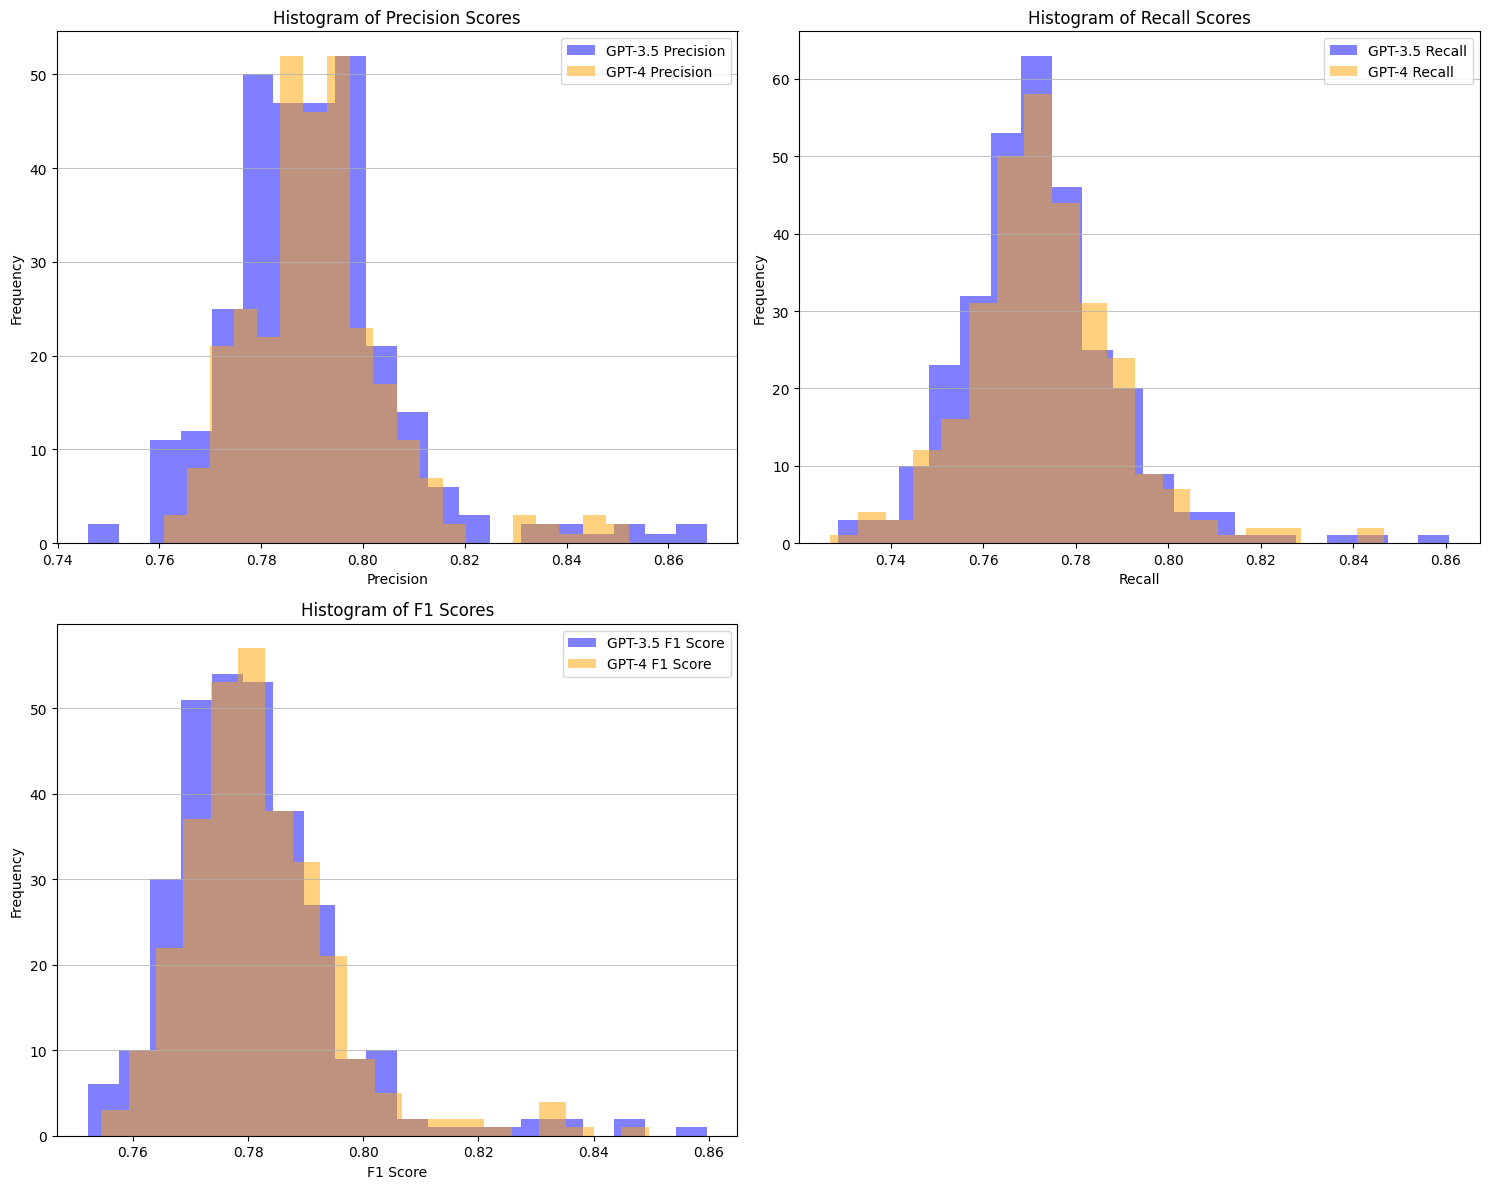

In [26]:
import matplotlib.pyplot as plt

def plot_histogram(ax, data1, data2, label1, label2, title, xlabel, ylabel):
    ax.hist(data1, bins=20, alpha=0.5, label=label1, color='blue')
    ax.hist(data2, bins=20, alpha=0.5, label=label2, color='orange')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.grid(axis='y', alpha=0.75)

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

plot_histogram(
    axs[0, 0],
    results_gpt35_precision, results_gpt4_precision,
    'GPT-3.5 Precision', 'GPT-4 Precision',
    'Histogram of Precision Scores',
    'Precision', 'Frequency'
)

plot_histogram(
    axs[0, 1],
    results_gpt35_recall, results_gpt4_recall,
    'GPT-3.5 Recall', 'GPT-4 Recall',
    'Histogram of Recall Scores',
    'Recall', 'Frequency'
)

plot_histogram(
    axs[1, 0],
    results_gpt35_f1, results_gpt4_f1,
    'GPT-3.5 F1 Score', 'GPT-4 F1 Score',
    'Histogram of F1 Scores',
    'F1 Score', 'Frequency'
)

fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()